# Spatial Modes

In [143]:
## general imports
import numpy as np
from numpy import *
from numpy.fft import fft,fft2,fftshift,ifftshift
fact = np.math.factorial

from scipy.special import j0, j1
from scipy.special import eval_hermite as Hermite

from matplotlib import colors
import matplotlib.pyplot as plt
from time import time
from random import random as rand

## local imports
import os,sys
sys.path.append(os.path.join("..","."))
from field_funcs import * # my helper functions
from physconsts import *

## make the display wide
from IPython.core.display import HTML, display, Image
display(HTML("<style>.container{width:100% !important;}</style>"))

# image path 
imagedir = os.path.join('.','images')
print("images saved in", imagedir)

images saved in .\images


## Spatially multi-mode fields

In [144]:
def hermite_gaussian(m,n,w0):
    """
    return a function Amn(x,y) for the amplitude of the 
    (m,n)th Hermite-Gaussian beam, taking args x,y and 
    assuming the beam is in focus (z=0) with waist w0.
    """
    
    return lambda x,y: sqrt(2/(pi*2**(m+n)*fact(m)*fact(n)))*(
                        Hermite(n,sqrt(2)*x/w0)*Hermite(m,sqrt(2)*y/w0)
                        )*exp(-(x**2+y**2)/w0**2)/w0

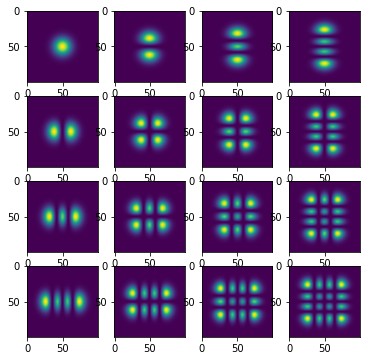

In [145]:
w0 = 1
hw = 3*w0
pts = 100
xarr, midpt, xx, yy = get_meshgrid(hw,pts)

nrange = 4
fig,axes = plt.subplots(nrange,nrange,figsize=(6,6))
for n in range(nrange):
    for m in range(nrange):
        mode = hermite_gaussian(m,n,w0)
        axes[n][m].imshow(mode(xx,yy)**2)

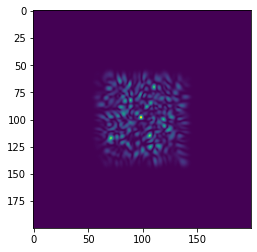

In [146]:
# Make a spatially multi-mode laser field

w0 = 1
hw = 10*w0
pts = 200
xarr, midpt, xx, yy = get_meshgrid(hw,pts)

nrange = 20

def multimode_field(nrange,w0,gridhw,pts):
    """
    Returns a Hermite Gaussian multimode field 
    
    Args:
        nrange: maximum mode number. modes will go up H.G.(nrange, nrange)
        w0: Gaussian waist w0
        gridhw: the realspace halfwidth of the output grid
        pts: the number of pixels in 1D; full output will be pts x pts
    Return:
        field: the complex field of dimensions of the meshgrid coordinates
    """
    field = zeros((pts,pts), complex)
    _,_,xx,yy = get_meshgrid(gridhw,pts)
    
    for n in range(nrange):
        for m in range(nrange):
            field += hermite_gaussian(m,n,w0)(xx,yy)*exp(-1j*2*pi*rand())
    return field

field = multimode_field(nrange,w0,hw,pts)
I2xy = real(field*conjugate(field))
I2xy /= amax(I2xy)
fig,ax = plt.subplots()
ax.imshow(I2xy)

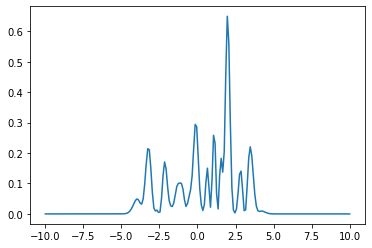

In [147]:
plt.plot(xarr, I2xy[100,])
# plt.ylim(0,0.025)